# Поведение струны в заисимости от начальных условий

Все мы знаем, что струна будет подчнияться волновому уравнению
$$\begin{align}
    \frac{\partial^2 u}{\partial t^2} &= c^2 \frac{\partial^2 u}{\partial x^2}
 \end{align}$$ 

Введём k как отношение шага сетки времени к шагу сетки пространства, умноженное на то самое с. Распишем производные разностным отношением
 
$$\begin{align} 
\frac{u(t_{i-1},x_j)+u(t_{i+1},x_j)-2 u(t_{i},x_j)}{\tau ^2} = 
{c^2} \frac{u(t_{i},x_{j-1})+u(t_{i},x_{j+1})-2 u(t_{i},x_j)}{h^2} \newline
u(t_{i-1},x_j)+u(t_{i+1},x_j)-2 u(t_{i},x_j) = 
k^2 [u(t_{i},x_{j-1})+u(t_{i},x_{j+1})-2 u(t_{i},x_j)] \newline
u(t_{i+1},x_{j}) =k^2 u(t_{i},x_{j-1}) +k^2u(t_{i},x_{j+1})+ 2 (1-k^2) u(t_{i},x_{j}) - u(t_{i-1},x_{j}) 
\end{align}$$

In [9]:
import numpy as np
def struna (init, T, L, h = 5 * 1e-3, tau = 1e-2):
    k2 = (tau / h)**2
    u = np.zeros((np.int(T / tau), np.int(L / h)))
    u[0,:] = init(L, h)
    u[1,:] = u[0,:] 
    for i in range (1, np.int(T / tau) - 1):
        for j in range (1, np.int(L / h) - 1):
            u[i + 1, j] = k2 * u[i,j - 1] + k2 * u[i,j + 1] + 2 * (1 - k2) * u[i,j] - u[i - 1,j] 
    return u

 Возмём струну длиной пи и оттянем её на расстоянии e на единицу, просто потому что мы можем

In [5]:
def ya_mogu(L, h):
    L = np.pi
    u = np.zeros(np.int(L / h))
    for i in range (np.int(L / h)):
        if i * h < np.e:
            u[i] = i * h / np.e
        else:
            u[i] =  (np.pi - i * h) / (np.pi - np.e)
    return u

In [10]:
 u = struna (ya_mogu, 2, np.pi)

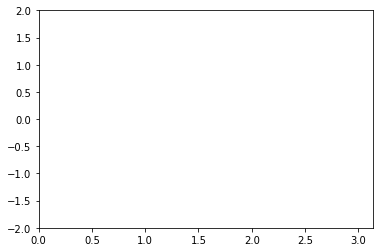

In [34]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, np.pi))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

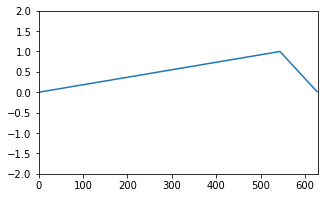

In [27]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\ffmpeg\\bin\\ffmpeg.exe'
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_xlim(( 0, np.pi*200))
ax.set_ylim((-2, 2))
line = ax.plot(u[0, :])[0]

def animate(i):
    line.set_ydata(u[i, :])
    
anim = FuncAnimation(fig, animate, interval=50, frames=u.shape[0]-1)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [24]:
anim

In [30]:
print(u)

[[0.         0.00036788 0.00073576 ... 0.00848703 0.0061247  0.00376237]
 [0.         0.00036788 0.00073576 ... 0.00848703 0.0061247  0.00376237]
 [0.         0.00036788 0.00073576 ... 0.00848703 0.0061247  0.        ]
 ...
 [0.                nan        nan ...        nan        nan 0.        ]
 [0.                nan        nan ...        nan        nan 0.        ]
 [0.                nan        nan ...        nan        nan 0.        ]]


In [25]:
from matplotlib import animation

def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    x = np.linspace(0, np.pi, 200)
    y = u[i]
    line.set_data(x, y)
    plt.pause(0.1)
    return (line,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)